In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


9.179298570399792
2.8539947557761023
2.880023730094191


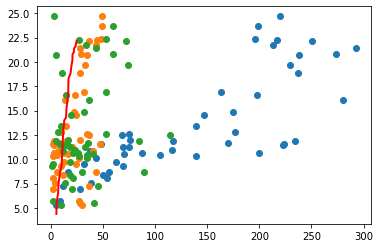

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

columns = ['TV', 'Radio', 'Newspaper']

for i,column in enumerate(columns):
    X_train, X_test, Y_train, Y_test = train_test_split(df[columns[0:i+1]], df['Sales'], random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    print(mean_squared_error(Y_test, reg.predict(X_test)))

plt.scatter(X_test.TV, Y_test), plt.scatter(X_test.Radio, Y_test), plt.scatter(X_test.Newspaper, Y_test)
plt.plot(Y_test.sort_values(), np.sort(reg.predict(X_test)), linewidth=2, color='r')
plt.show()



['TV']

 Estimators = 1 

0.5767309073398589
[18.  19.2 20.7  5.3 20.1 14.7 22.6 10.1 11.7 17.1  8.8 11.8 13.4  6.6
 12.2 11.7  6.6 11.7  9.9 12.5 15.5 13.6 10.8 20.2 13.6 11.8 17.1 12.2
 12.9  4.8 11.4 13.6 18.3  5.9 25.5 12.5 10.1 11.8 13.2  8.8 11.9 17.1
  9.6  9.7 11.7 10.8 13.6 17.3 14.   9.4]
MSE: 11.4480
MAE: 2.5680


['TV', 'Radio']

 Estimators = 1 

0.9766033646195548
[17.3 23.8 20.7  6.6 23.8 13.3 22.6  9.7 11.7 15.5  8.8  9.4 12.   6.6
 10.3 12.6  6.6 16.6 10.9 20.2 20.1 13.3 10.8 21.5  9.9  9.4 22.6 12.2
 10.6  6.6 11.4 10.9 23.8  8.  15.9 20.2 10.4 20.2 12.2  5.9 12.2 12.9
  9.6  9.7 11.7  9.4 10.9 15.5  9.7 10.9]
MSE: 0.6328
MAE: 0.6640


['TV', 'Radio', 'Newspaper']

 Estimators = 1 

0.9622060039729913
[17.1 23.8 20.2  6.6 23.8 13.3 22.6  9.7 11.7 15.5  8.8  9.6 12.7  8.
 10.3 12.6  6.6 16.6 10.9 20.2 20.1 13.3 10.8 21.5 10.6  9.6 22.6 12.2
  9.7  8.  11.4 10.9 23.8  9.2 15.7 20.7 10.4 20.2 12.2  5.3 12.2 12.9
  9.6  9.7 11.7  9.7 10.9 15.5  9.6 10.1]
MSE: 1.0222
MAE

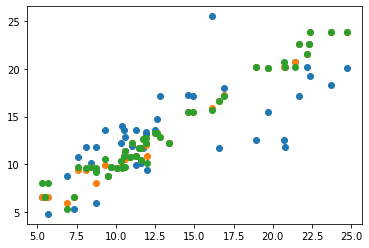

In [50]:
def RandomForestRegression(X_train, X_test, y_train, y_test):
    # additional source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    for estimator in [1, 2, 3, 4, 20]:
        rf = RandomForestRegressor(n_estimators=estimator, random_state=42)
        rf.fit(X_train, y_train)
        print("\n Estimators = %i \n" %estimator)
        print(rf.score(X_test, y_test))
        # Use the forest's predict method on the test data
        predictions = rf.predict(X_test)
        print(predictions)
        print("MSE: %.4f" %mean_squared_error(y_test, predictions))
        print("MAE: %.4f" %mean_absolute_error(y_test, predictions))
        
        plt.scatter(y_test, predictions)
        return rf
        
for i,column in enumerate(columns):
    print('\n')
    print(columns[0:i+1])
    X_train, X_test, Y_train, Y_test = train_test_split(df[columns[0:i+1]], df['Sales'], random_state=42)
    rf = RandomForestRegression(X_train, X_test, Y_train, Y_test)

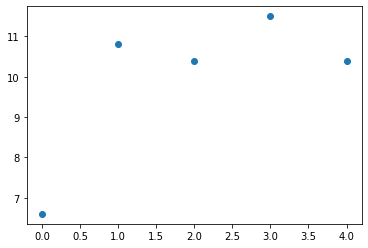

In [46]:
test = np.array([[10,23,34,36,50], [30,53,64,66,90] ,[18,23,54,76,150]])
preds = rf.predict(test.reshape(5,3))
plt.scatter(np.arange(0,5), preds)

In [48]:
rf.coefs_

AttributeError: 'RandomForestRegressor' object has no attribute 'coefs_'